### Filtering

Since this is mostly data work and visualization, we will present all results in this Python notebook.

In [5]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# Lets get the data for real GDP, real consumption, real investment and GDP deflator.

rGDP = web.DataReader("GDPC1", "fred", start, end) 
rCON = web.DataReader("PCECC96", "fred", start, end)
rINV = web.DataReader("GPDIC1", "fred", start, end)
GDPdef = web.DataReader("GDPDEF", "fred", start, end)


#### Exercise 3

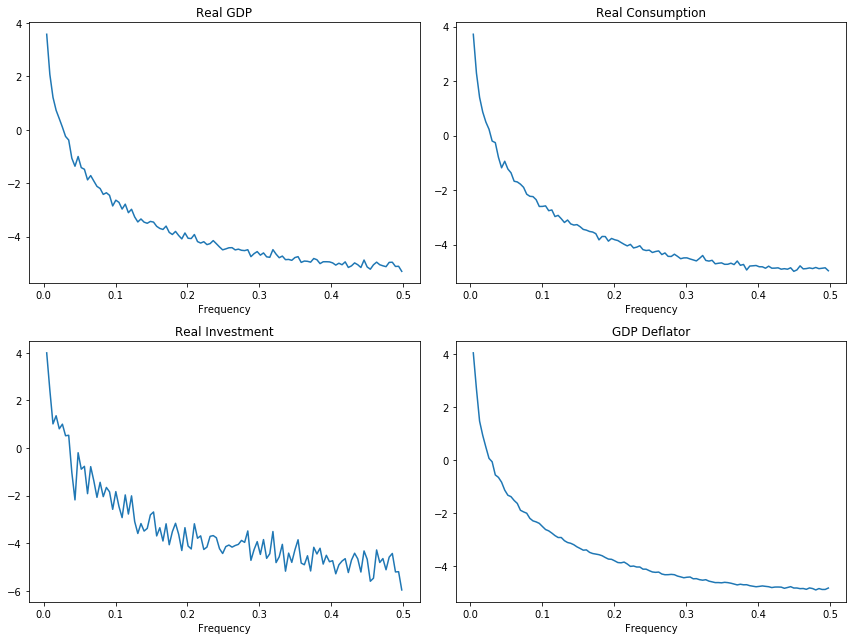

In [10]:
# Lets write a function to plot the spectral density estimates

def spectdens(x, name):
    logx = np.log(x.values)
    xfreq, xper = sig.periodogram(logx, axis=0)
    plt.plot(xfreq[1:], np.log(xper[1:]))
    plt.title(name)
    plt.xlabel('Frequency')

plt.figure(figsize=(12,9))
plt.subplot(221)
spectdens(rGDP, "Real GDP")
plt.subplot(222)
spectdens(rCON, "Real Consumption")
plt.subplot(223)
spectdens(rINV, "Real Investment")
plt.subplot(224)
spectdens(GDPdef, "GDP Deflator")
plt.tight_layout()
plt.show()

#### Exercise 4

In [24]:
# Lets write a function to take the HP filter

def HPfilplot(x, l, title):
    logx = np.log(x.values)
    xcy, xtr = sm.tsa.filters.hpfilter(logx, l)
    
    xcfreq, xcyper = sig.periodogram(xcy, axis=0)
    xtfreq, xtrper = sig.periodogram(xtr, axis=0)

    plt.subplot(211)
    plt.plot(xcfreq[1:], np.log(xcyper[1:]))
    plt.title(title + ' - cyclical')
    plt.xlabel('Frequency')
    plt.subplot(212)
    plt.plot(xtfreq[1:], np.log(xtfreq[1:]))
    plt.title(title + ' - trend')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

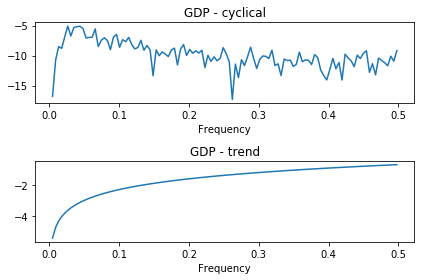

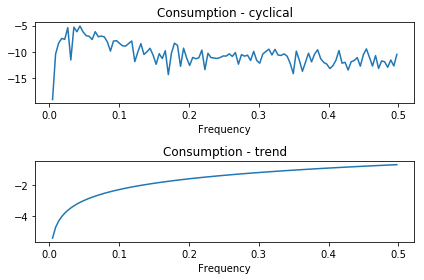

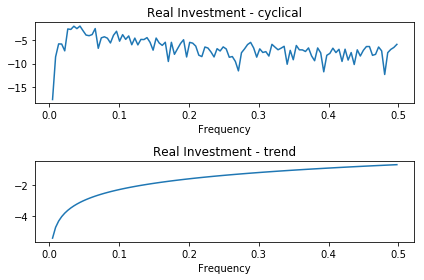

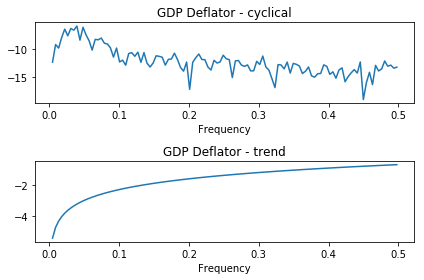

In [23]:
HPfil(rGDP, 1600, "GDP")

HPfil(rCON, 1600, "Consumption")

HPfil(rINV, 1600, "Real Investment")

HPfil(GDPdef, 1600, "GDP Deflator")

#### Exercise 4

In [32]:
lvec = np.array([100, 400, 1600, 6400, 25600])

def HPfilterMacro(x,gdp, l, moments = True ):
    logx = np.log(x.values)
    loggdp = np.log(gdp.values)
    xcy, xtr = sm.tsa.filters.hpfilter(logx, l)
    gdpcy, gdptr = sm.tsa.filters.hpfilter(loggdp, l)
    
    if moments:
        print("Lambda = ", l,
            "\nStandard Deviation = ", np.std(xtr),
         "\nAutocorrelation = ", np.corrcoef(xtr[1:], xtr[:-1])[0,1],
         "\nCorrelation = ", np.corrcoef(xtr, gdptr)[0,1])

    return xtr

In [44]:
filtered = {} 

print("\033[4mGDP\033[0m")
for i in range(len(lvec)):
    filtered['GDP'+str(lvec[i])] = HPfilterMacro(rGDP, rGDP, lvec[i])

print("\033[4mConsumption\033[0m")
for i in range(len(lvec)):
    filtered['CON'+str(lvec[i])] = HPfilterMacro(rCON, rGDP, lvec[i])

print("\033[4mInvestment\033[0m")    
for i in range(len(lvec)):
    filtered['INV'+str(lvec[i])] = HPfilterMacro(rINV, rGDP, lvec[i])

print("\033[4mGDP Deflator\033[0m")
for i in range(len(lvec)):
    filtered['GDPdef'+str(lvec[i])] = HPfilterMacro(GDPdef, rGDP, lvec[i])

GDP
Lambda =  100 
Standard Deviation =  0.498499481639 
Autocorrelation =  0.999978012312 
Correlation =  1.0
Lambda =  400 
Standard Deviation =  0.498407693412 
Autocorrelation =  0.99998687643 
Correlation =  1.0
Lambda =  1600 
Standard Deviation =  0.498302903253 
Autocorrelation =  0.999992278774 
Correlation =  1.0
Lambda =  6400 
Standard Deviation =  0.498175496037 
Autocorrelation =  0.999995173048 
Correlation =  1.0
Lambda =  25600 
Standard Deviation =  0.497978066579 
Autocorrelation =  0.999996968871 
Correlation =  1.0
Consumption
Lambda =  100 
Standard Deviation =  0.539469570373 
Autocorrelation =  0.999983565373 
Correlation =  0.999695720643
Lambda =  400 
Standard Deviation =  0.539403128398 
Autocorrelation =  0.999989130307 
Correlation =  0.999726029411
Lambda =  1600 
Standard Deviation =  0.539311402016 
Autocorrelation =  0.999992949441 
Correlation =  0.999760754939
Lambda =  6400 
Standard Deviation =  0.539178022751 
Autocorrelation =  0.999995589769 
Co

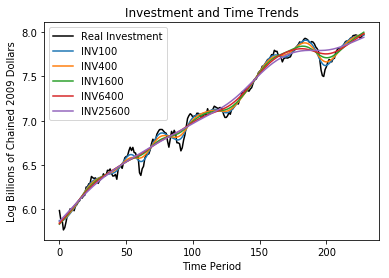

In [40]:
# We can also plot the time series for investment

plt.plot(range(len(np.log(rINV))),np.log(rINV), 'k-', label="Real Investment")
for i in range(len(lvec)):
    plt.plot(range(len(np.log(rINV))), filtered['INV'+str(lvec[i])], label='INV'+str(lvec[i]))
plt.xlabel("Time Period")
plt.ylabel("Log Billions of Chained 2009 Dollars")
plt.legend()
plt.title("Investment and Time Trends")
plt.show()

#### Exercise 6

In [89]:
#Define Function to compute our desired moments

def printtrendmoments(trx, trgdp):
    print("Volatility = ", np.std(trx),
         "\nRelative Volatility = ", np.std(trx)/np.std(trgdp),
          "\nAutocorrelation = ", np.corrcoef(trx[1:], trx[:-1])[0,1],
          "\nCorrelation with GDP = ", np.corrcoef(trx, trgdp)[0,1])

#List of desired series
serieslist = ["GDPC1", "PCECC96", "GPDIC1", "GDPDEF","W068RCQ027SBEA","EXPGSC1","IMPGSC1"]
seriesnames = ["GDP","Consumption","Investment","GDP Deflator","Govt Spending","Exports","Imports"]

mserieslist = ["PAYEMS", "UNRATE","CIVPART","A576RC1","M2SL", "CPIAUCSL"]
mseriesnames = ["Employment", "Unemployment Rate","Participation Rate","Nominal Wages","Money Stock","CPI All"]


# Generate Detrended GDP first
gdp = np.log(rGDP.values)
gdplin = np.squeeze(sig.detrend(gdp))
gdpdiff = np.squeeze((gdp[1:] - (gdp[1:] - gdp[:-1])))
gdphpcy, gdphp = sm.tsa.filters.hpfilter(gdp, 1600)
gdpbk = np.squeeze(gdp[8:-8] - sm.tsa.filters.bkfilter(gdp, 6, 32, 8))

#Pulling Data
x = {}
for i in range(len(serieslist)):
    data = web.DataReader(serieslist[i], "fred", start, end) 
    x[seriesnames[i]] = np.log(data.values)
    
# We deal with some tricky non quarterly and negative value series

#Net Exports
netexp = web.DataReader("NETEXP", "fred", start, end)
x["Net Exports"] = netexp.values / rGDP.values

#Deficit (Incorrect Shape)
#deficit = web.DataReader("M318501Q027NBEA", "fred", start, end)
#x["Budget Deficit"] = deficit.values / rGDP.values

#Monthly Data
for i in range(len(mserieslist)):
    data = web.DataReader(mserieslist[i], "fred", start, end) 
    data = data.resample('3M').mean()
    x[mseriesnames[i]] = np.log(data.values)



    
for key in x:
    xlin = np.squeeze(sig.detrend(x[key]))
    xdiff = np.squeeze(x[key][1:] - (x[key][1:] - x[key][:-1]))
    xcy, xhp = sm.tsa.filters.hpfilter(x[key], 1600)
    xbk = np.squeeze(x[key][8:-8] - sm.tsa.filters.bkfilter(x[key], 6, 32, 8))
    print("\033[4m"+key+"\033[0m")
    print("\033[4mLinear Detrend\033[0m")
    printtrendmoments(xlin, gdplin)
    print("\033[4mFirst Differences\033[0m")
    printtrendmoments(xdiff, gdpdiff)
    print("\033[4mHP Filter\033[0m")
    printtrendmoments(xhp, gdphp)
    print("\033[4mBK Filter\033[0m")
    printtrendmoments(xbk, gdpbk)
    

GDP
Linear Detrend
Volatility =  8.27786728639e-16 
Relative Volatility =  1.0 
Autocorrelation =  0.0327883340698 
Correlation with GDP =  1.0
First Differences
Volatility =  0.497394404748 
Relative Volatility =  1.0 
Autocorrelation =  0.999866749402 
Correlation with GDP =  1.0
HP Filter
Volatility =  0.498302903253 
Relative Volatility =  1.0 
Autocorrelation =  0.999992278774 
Correlation with GDP =  1.0
BK Filter
Volatility =  0.462931118667 
Relative Volatility =  1.0 
Autocorrelation =  0.99991363072 
Correlation with GDP =  1.0
Consumption
Linear Detrend
Volatility =  8.13599761238e-16 
Relative Volatility =  0.982861566983 
Autocorrelation =  0.095487561553 
Correlation with GDP =  -0.0476197814019
First Differences
Volatility =  0.538041496333 
Relative Volatility =  1.08172004188 
Autocorrelation =  0.999925335368 
Correlation with GDP =  0.999604940105
HP Filter
Volatility =  0.539311402016 
Relative Volatility =  1.08229632719 
Autocorrelation =  0.999992949441 
Correlat

We attempt to replicate the stylized facts for the US economy as best as possible for each of the 4 types of filter. However, certain portions of data were inconsistent or difficult to find, and hence are not calculated yet, such as the budget deficit, as well as real, nominal wages and interest rates.